['5' '0' '4' ... '4' '5' '6']
Accuracy: 0.92


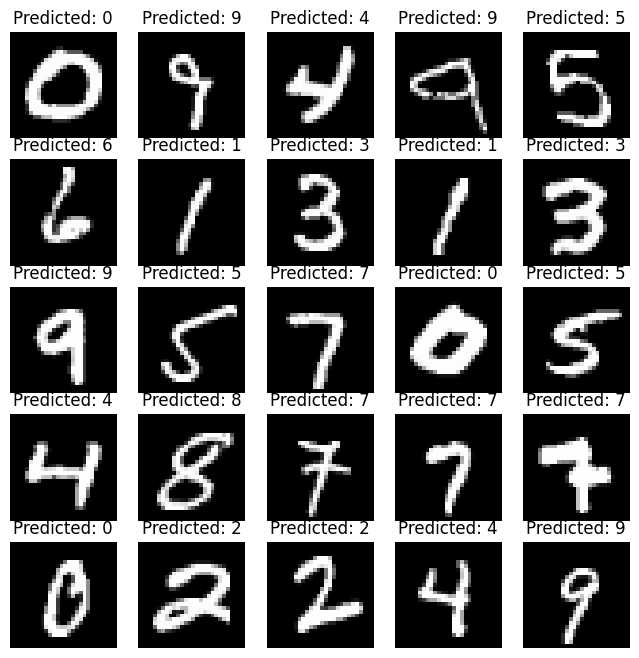

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# load the mnist dataset
mnist = fetch_openml("mnist_784", as_frame=False)

# separate data and labels
X, y = mnist.data, mnist.target

print(y)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# train a logistic regression model
# saga solver
# 100 iterations to find a solution
# 0.1 tolerance (stops early if change in loss is smaller than 0.1)
model = LogisticRegression(solver='saga', max_iter=100, tol=0.1)
model.fit(X_train, y_train)

# predict on the test set
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# visualize some predictions
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Predicted: {y_pred[i]}")
    ax.axis('off')
plt.show()